In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import time 
from statistics import mean


In [2]:
train = pd.read_csv("../input/intro2ml-kpfu-1/train.csv")

In [3]:
train_x= train[['GrLivArea','1stFlrSF','TotalBsmtSF','YearBuilt','GarageArea','WoodDeckSF','2ndFlrSF',]].fillna (0)
train_x.head()
train_y = train['SalePrice'].values

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(train_x, train_y)
train_predictions = model.predict(train_x)

In [5]:
from sklearn.metrics import mean_squared_error

rmse_full_mod = mean_squared_error(train_predictions, train_y)
rmse_full_mod

42201.25906045374

In [6]:
results = []

# итерация по каждому 
for predictor in train_x:
    
    # Создадим копию X_test
    X_test_copy = train_x.copy()
    
    # перемешиваем заданную колонку
    X_test_copy[predictor] = train_x[predictor].sample(frac=1).values
    
    # посчитаем навое значение ошибки 
    new_rmse = mean_squared_error(model.predict(X_test_copy), train_y)
    
    # добавим значение в массив
    results.append({'pred': predictor,
                    'score': new_rmse - rmse_full_mod })

# Put the results into a pandas dataframe and rank the predictors by score
resultsdf = pd.DataFrame(results).sort_values(by = 'score', ascending = False)
    

In [7]:
resultsdf

,pred,score
3,YearBuilt,8092.626209
0,GrLivArea,6604.454145
6,2ndFlrSF,6446.530214
1,1stFlrSF,5026.320084
2,TotalBsmtSF,5005.920779
4,GarageArea,3451.487265
5,WoodDeckSF,613.624813


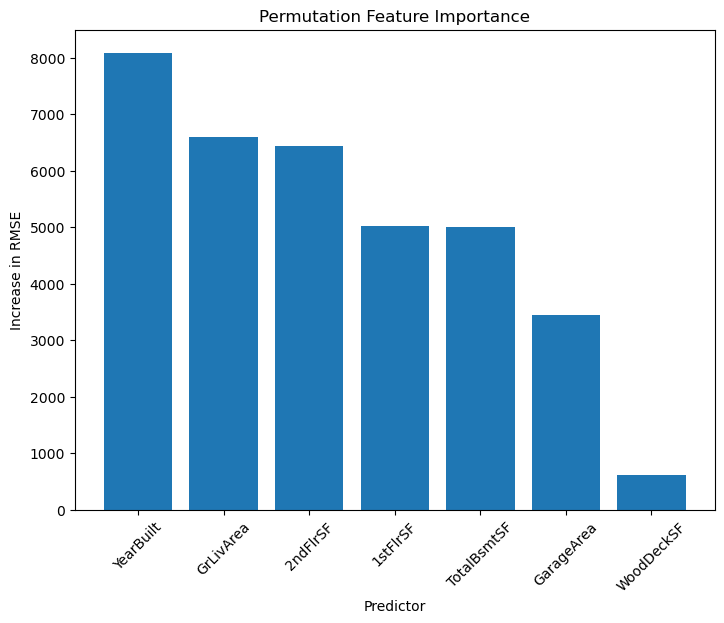

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Increase in RMSE')
ax.set_xlabel('Predictor')
ax.set_title('Permutation Feature Importance')

predictors = resultsdf.pred
y_pos = range(len(predictors))
scores = resultsdf.score
ax.bar(predictors,scores)
plt.xticks(y_pos, predictors, rotation=45)
plt.show()